# Introduction

**Welcome to the Automatidata Project!**

Automatidata specializes in providing data-driven insights to help businesses optimize their operations and make informed decisions.

For this case study, Automatidata has been hired by a client in the transportation industry to analyze and improve their pricing strategy. The client operates a fleet of taxis and wants to better understand the factors that influence taxi fares in New York City. The ultimate goal is to develop a model that can predict taxi fares based on trip details such as distance, time, and other relevant variables.

The client has identified inconsistencies in fare pricing, leading to customer complaints and potential revenue loss. They need a predictive model to estimate fares more accurately, ensuring fair pricing for both passengers and drivers. By leveraging historical trip data, we aim to:

* Identify key factors influencing taxi fares.

* Build a machine learning model to predict fares.

* Provide actionable insights to improve pricing strategies.

**Data**

| Column Name            | Description  |
|------------------------|-------------|
| **ID**                | Trip identification number |
| **VendorID**          | A code indicating the TPEP provider that provided the record. <br> 1 = Creative Mobile Technologies, LLC <br> 2 = VeriFone Inc. |
| **tpep_pickup_datetime** | The date and time when the meter was engaged. |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **Passenger_count**    | The number of passengers in the vehicle. This is a driver-entered value. |
| **Trip_distance**      | The elapsed trip distance in miles reported by the taximeter. |
| **PULocationID**      | TLC Taxi Zone in which the taximeter was engaged. |
| **DOLocationID**      | TLC Taxi Zone in which the taximeter was disengaged. |
| **RateCodeID**        | The final rate code in effect at the end of the trip. <br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br> 4 = Nassau or Westchester <br> 5 = Negotiated fare <br> 6 = Group ride |
| **Store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor (store and forward). <br> Y = store and forward trip <br> N = not a store and forward trip |
| **Payment_type**      | A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br> 2 = Cash <br> 3 = No charge <br> 4 = Dispute <br> 5 = Unknown <br> 6 = Voided trip |
| **Fare_amount**       | The time-and-distance fare calculated by the meter. |
| **Extra**            | Miscellaneous extras and surcharges, including the $0.50  and $1 rush hour and overnight charges. |
| **MTA_tax**          | \$0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| **Improvement_surcharge** | $0.30 improvement surcharge assessed at the flag drop. Began in 2015. |
| **Tip_amount**     | Tip amount – Automatically populated for credit card tips. Cash tips are not included. |
| **Tolls_amount**     | Total amount of all tolls paid in the trip. |
| **Total_amount**     | The total amount charged to passengers (excluding cash tips). |


# Imports

In [1]:
# @title connection to google drive
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# @title Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Packages for OLS, MLR, confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error


In [4]:
# @title load the data file
# Reading the CSV file into a DataFrame called 'df' using the read_csv() function
df = pd.read_csv("/content/drive/MyDrive/Google Advanced Data Analytics Professional Certificate/Automatidata/2017_Yellow_Taxi_Trip_Data.csv")  #here you should put your path to the csv file

# Data Exploration (Initial EDA and data cleaning)

In [5]:
#make a copy of the dataframe
df0 = df.copy()

#basic info of our DataFrame
display(df0.info())

# Displaying the first few rows of the DataFrame using the head() function
display(df0.head(10))

#basic stats
display(df0.describe())

#basic stats
display(df0.describe(include=['object']) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

None

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,22699,22699,22699
unique,22687,22688,2
top,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,N
freq,2,2,22600


Let's examine the values in the tax and additional charge columns to determine their impact on fare pricing, identify any unusual entries, and assess their relevance to our predictive model.

In [6]:
df0.mta_tax.value_counts()

,count
mta_tax,
0.5,22596
0.0,90
-0.5,13


In [7]:
df0.improvement_surcharge.value_counts()

,count
improvement_surcharge,
0.3,22679
-0.3,14
0.0,6


In [8]:
df0.fare_amount.value_counts().sort_index()

,count
fare_amount,
-120.00,1
-4.50,2
-4.00,2
-3.50,3
-3.00,2
...,...
175.00,1
200.00,1
200.01,1


Let's count all instances where the fare amount is zero or negative to identify potential data quality issues and assess their impact on our analysis.

In [9]:
df0["fare_amount"][df0["fare_amount"]< 0.01].value_counts()

,count
fare_amount,
0.0,6
-2.5,4
-3.5,3
-3.0,2
-4.5,2
-4.0,2
-120.0,1


In [10]:
df0[df0["fare_amount"]== -120]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3


We will delete the Unnamed: 0 column because it does not provide any meaningful information about the rides.

Additionally, we will remove the Store_and_fwd_flag column, as it only indicates whether the trip record was temporarily stored in the vehicle’s memory before being transmitted to the vendor. This does not contribute useful insights about the trip or its cost.

We will also eliminate any zero and negative values in the mta_tax, improvement_surcharge and fare_amount columns as they are illogical. These may represent canceled rides.

While we could group them and label them as "canceled," their count is insignificant, so we will exclude them from the analysis.



In [33]:
df0.drop(columns=["Unnamed: 0", "Store_and_fwd_flag"], inplace=True, errors="ignore")
df0 = df0[(df0["mta_tax"] > 0) & (df0["improvement_surcharge"] > 0) & (df0["fare_amount"] > 0)]

print(f'{df.shape[0] - df0.shape[0]} entries deleted')

104 entries deleted


In [34]:
df0.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
count,22595.000000,22595,22595,22595.000000,22595.000000,22595.000000,22595.000000,22595.000000,22595.000000,22595.000000,22595.000000,22595.0,22595.000000,22595.000000,2.259500e+04,22595.000000,22595.000000
mean,1.556141,2017-06-29 07:34:36.914937088,2017-06-29 07:51:32.816773632,1.641823,2.887793,1.031998,162.404204,161.668511,1.335074,12.811689,0.334720,0.5,1.806676,0.285952,3.000000e-01,16.044341,16.931696
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,4.000000,1.000000,1.000000,2.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,3.300000,-16.983000
25%,1.000000,2017-03-30 03:41:58,2017-03-30 03:45:40,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,8.750000,6.667000
50%,2.000000,2017-06-23 13:27:40,2017-06-23 13:50:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.5,1.350000,0.000000,3.000000e-01,11.800000,11.167000
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.040000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.5,2.450000,0.000000,3.000000e-01,17.800000,18.317000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.920000,99.000000,265.000000,265.000000,4.000000,200.010000,4.500000,0.5,51.640000,17.280000,3.000000e-01,258.210000,1439.550000
std,0.496849,NaN,NaN,1.285215,3.592779,0.682287,66.576576,69.867131,0.492313,10.559443,0.463242,0.0,2.378197,1.265914,1.172421e-13,13.008563,61.438689


now our data makes more sense, we have some extreme values but will check them in our analysis but first lets make some additiona data about duration of the trip, as well the month, and day it occured

Now our data is more meaningful. While we do have some extreme values, we will address them during our analysis. First, let's create additional columns for the duration of the trip, as well as the month and day the trip occurred.

In [35]:
df0['tpep_pickup_datetime']=pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime']=pd.to_datetime(df0['tpep_dropoff_datetime'])
# Create a month column
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime('%b')
# Create a day column
df0['day'] = df0['tpep_pickup_datetime'].dt.strftime('%a')
# Create `duration` column  in minutes
df0['duration'] = round((df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m'),3)
df0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,Mar,Sat,14.067
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,Apr,Tue,26.500
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,Dec,Fri,7.200
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sun,30.250
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,Apr,Sat,16.717


In [36]:
df0[df0["extra"] == 4.5]["RatecodeID"].describe()

,RatecodeID
count,101.0
mean,2.0
std,0.0
min,2.0
25%,2.0
50%,2.0
75%,2.0
max,2.0


all trips with extra of 4.5 have a fare amount of 52 and RateCodeID of 2.0

In [37]:
df0[df0["RatecodeID"] == 2]["fare_amount"].describe()

,fare_amount
count,513.0
mean,52.0
std,0.0
min,52.0
25%,52.0
50%,52.0
75%,52.0
max,52.0


all  RateCodeID of 2 have a fixed fare amount of 52

In [54]:
print(df0["improvement_surcharge"].value_counts())
print(df0["mta_tax"].value_counts())
print(df0.shape[0])

improvement_surcharge
0.3    22595
Name: count, dtype: int64
mta_tax
0.5    22595
Name: count, dtype: int64
22595


all of my trips have a improvement_surcharge of 0.3 and a mta tax of 0.5

We will also delete those columns(improvement_surcharge,mta tax) because they do not provide additional information for our analysis, as the relevant data is already included in the total_amount variable. Additionally, we will create a new column for airport trips, as they have a fixed fare amount, which will help improve the performance of our model.



In [55]:
df0.drop(columns=['improvement_surcharge', 'mta_tax'], inplace=True)
df0['is_airport_trip'] = df0['RatecodeID'].apply(lambda x: 1 if x in [2,3] else 0)
df0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,month,day,duration,is_airport_trip
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,2.76,0.0,16.56,Mar,Sat,14.067,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,4.00,0.0,20.80,Apr,Tue,26.500,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,1.45,0.0,8.75,Dec,Fri,7.200,0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,6.39,0.0,27.69,May,Sun,30.250,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.00,0.0,17.80,Apr,Sat,16.717,0


##Outliers

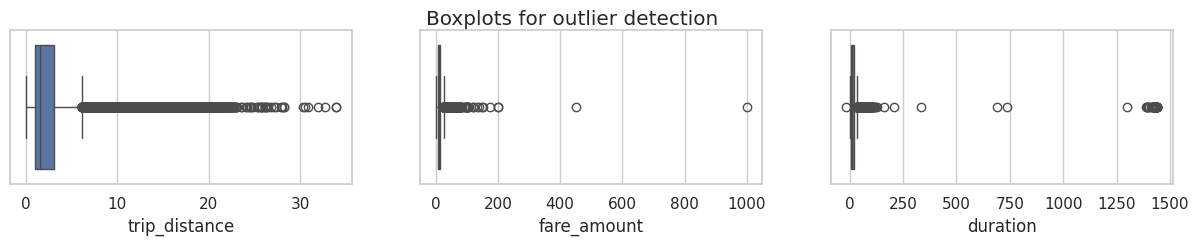

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0], x=df0['trip_distance'])
sns.boxplot(ax=axes[1], x=df0['fare_amount'])
sns.boxplot(ax=axes[2], x=df0['duration'])
plt.show();

The maximum fare amount in this dataset is nearly \$1,000, which seems very unlikely. High values for this feature can be capped based on intuition and statistics. The interquartile range (IQR) is \$8. The standard formula of Q3 + (1.5 * IQR) yields \$26.50. That doesn't seem appropriate for the maximum fare cap. In this case, we'll use a factor of 6, which results in a cap of $62.50.

Same can be told about duration, we would set the maximum to 88.21 minutes who seems a reasonable duration

In [56]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [59]:
# Impute the high  fare_amount outliers
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22595.000000
mean        12.772636
std         10.245335
min          2.500000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [60]:
# Impute the high  duration outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.317
upper_threshold: 88.21700000000001
count    22595.000000
mean        14.423641
std         11.851857
min          0.000000
25%          6.667000
50%         11.167000
75%         18.317000
max         88.217000
Name: duration, dtype: float64



## Data analysis

<ipython-input-61-a9745700f857>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_order)


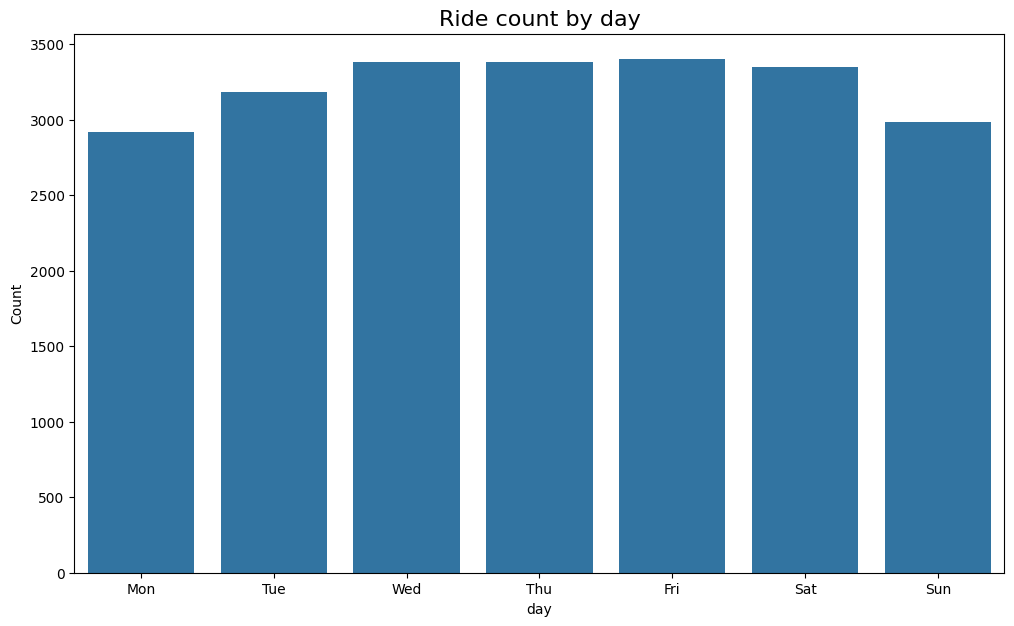

In [61]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(12,7))
ax = sns.countplot(data= df0, x="day",order =day_order )
ax.set_xticklabels(day_order)
ax.set_ylabel('Count')
plt.title('Ride count by day', fontsize=16)
plt.show()

Wednesday through Saturday had the highest number of daily rides, while Sunday and Monday had the least.

<ipython-input-62-7aa70aaafd43>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_order)


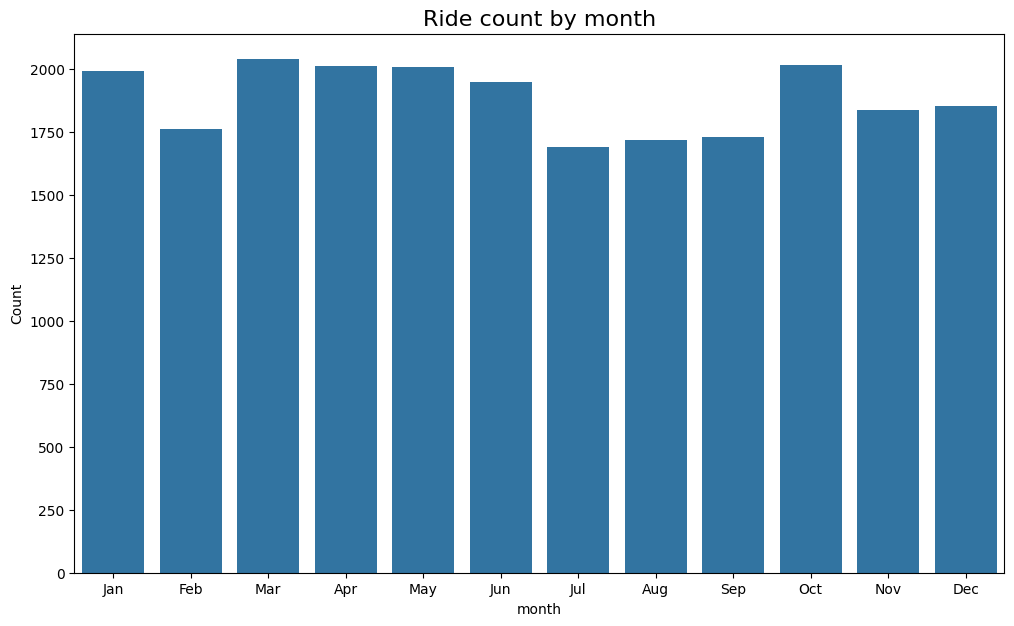

In [62]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12,7))
ax = sns.countplot(data= df0, x="month",order= month_order )
ax.set_xticklabels(month_order)
ax.set_ylabel('Count')
plt.title('Ride count by month', fontsize=16)
plt.show()

July and August, summer months, have the lowest count of rides, March comes first with over 2000 rides

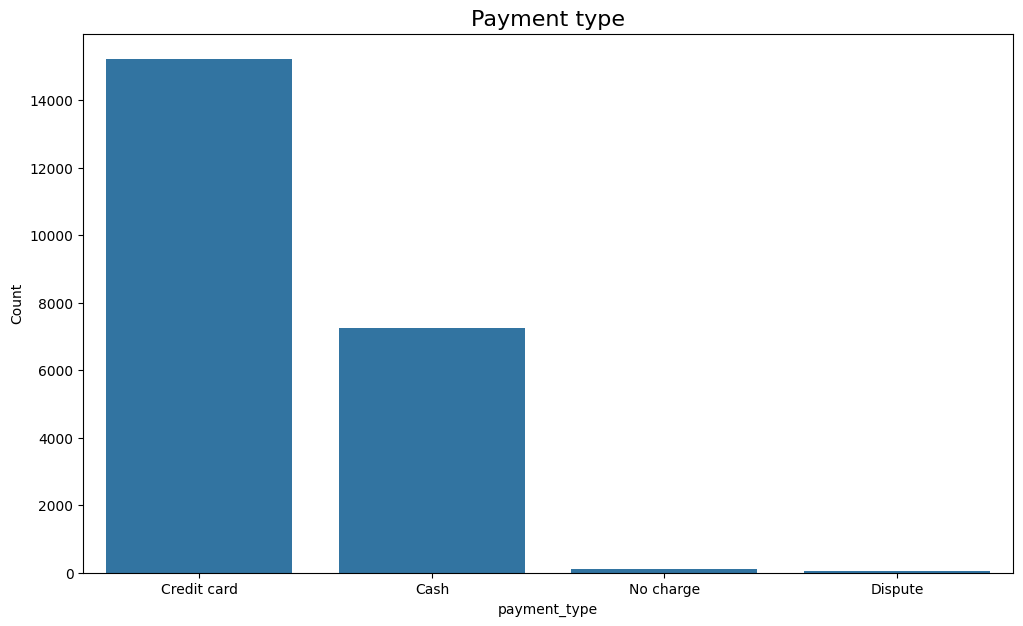

In [63]:
plt.figure(figsize=(12,7))
ax = sns.countplot(data= df0, x="payment_type")
ax.set_ylabel('Count')
ax.set_xticks([0,1, 2, 3])
ax.set_xticklabels(["Credit card", "Cash", "No charge", "Dispute"])
plt.title('Payment type', fontsize=16);
plt.show()

In [ ]:
display(df0.groupby('payment_type')['total_amount'].agg(["count", "min", "max", "mean"]))
display(df0.groupby('payment_type')['tip_amount'].agg(["count", "min", "max", "mean"]))
display(df0.groupby('payment_type')['duration'].agg(["count", "min", "max", "mean"]))

,count,min,max,mean
payment_type,,,,
1,15262,3.30,1200.29,17.667050
2,7266,1.30,450.30,13.547685
3,112,0.31,78.30,14.813750
4,39,3.30,64.32,17.116923


,count,min,max,mean
payment_type,,,,
1,15262,0.0,200.0,2.730337
2,7266,0.0,0.0,0.000000
3,112,0.0,0.0,0.000000
4,39,0.0,0.0,0.000000


,count,min,max,mean
payment_type,,,,
1,15262,0.000,88.679,14.788528
2,7266,0.000,88.679,13.813568
3,112,0.000,61.117,11.506687
4,39,0.033,69.700,16.070128


In [ ]:
df0.groupby('payment_type')['tip_amount'].mean()/df0.groupby('payment_type')['total_amount'].mean()

,0
payment_type,
1,0.154544
2,0.000000
3,0.000000
4,0.000000


Interestingly, only customers who paid with a card left a tip, with an average tip rate of 15.5%.

Additionally, trips paid with a card had an average duration that was 1 minute longer than those paid with cash.

For the other two payment types, the number of rides is too low to draw meaningful conclusions.

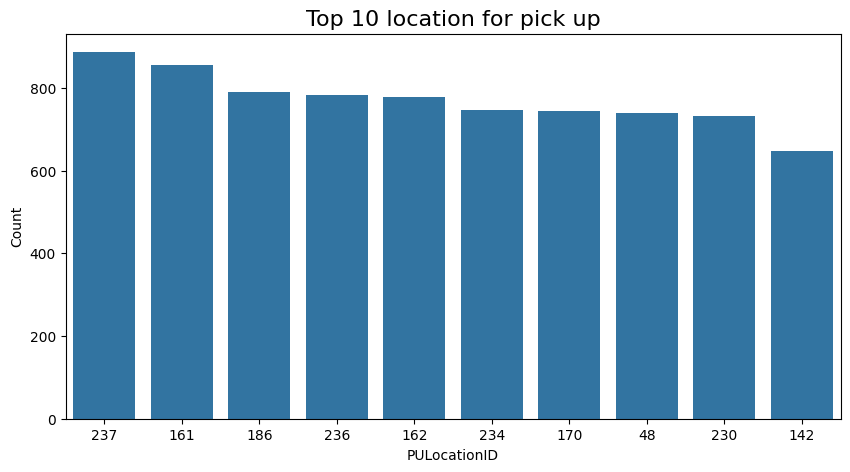

In [64]:
top_10_a = df0["PULocationID"].value_counts().nlargest(10)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_a.index, y=top_10_a.values, order=top_10_a.index)
plt.ylabel('Count')
plt.title('Top 10 location for pick up', fontsize=16);

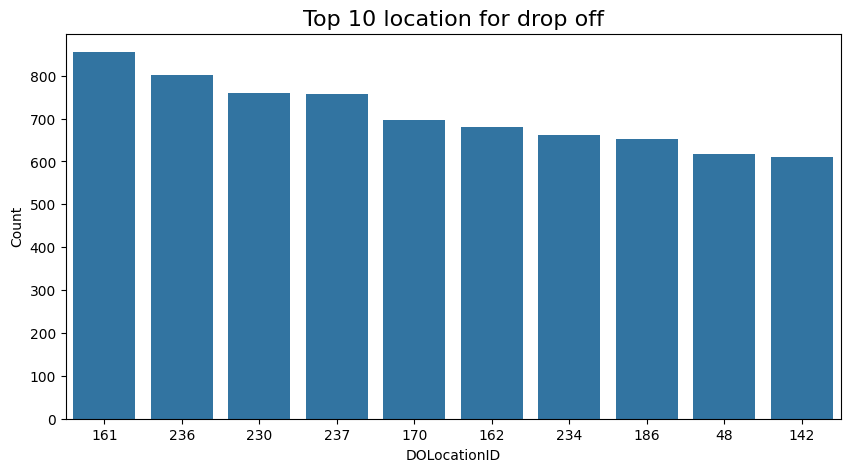

In [65]:

top_10_b = df0["DOLocationID"].value_counts().nlargest(10)

# Plot the results
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_b.index, y=top_10_b.values, order=top_10_b.index)
plt.ylabel('Count')
plt.title('Top 10 location for drop off', fontsize=16);

Another interesting finding is that the top 10 pickup locations are the same as the top 10 drop-off locations. While we don't have a map to visualize these locations, they are likely business districts, transit hubs, or other high-traffic areas.


Mean: 12.909287005599893
Median: 9.5


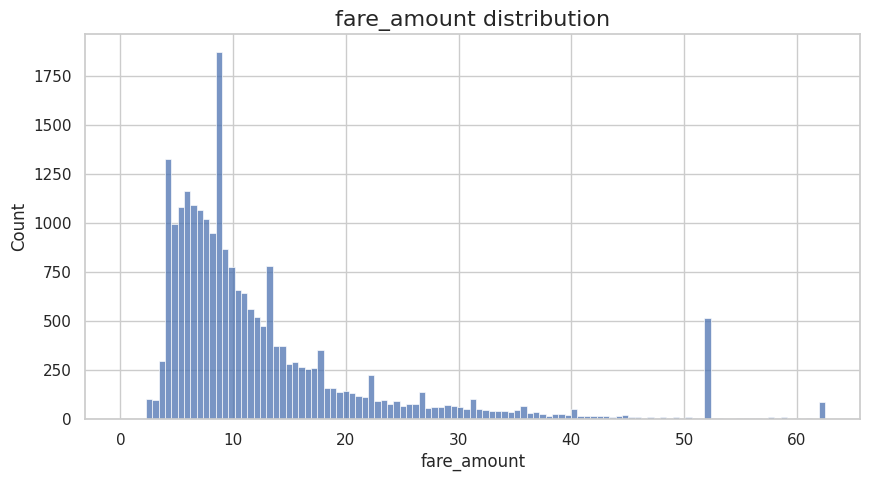

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df0["fare_amount"])
plt.title('fare_amount distribution', fontsize=16);
print(f'Mean: {df0["fare_amount"].mean()}')
print(f'Median: {df0["fare_amount"].median()}')

6.5
14.5


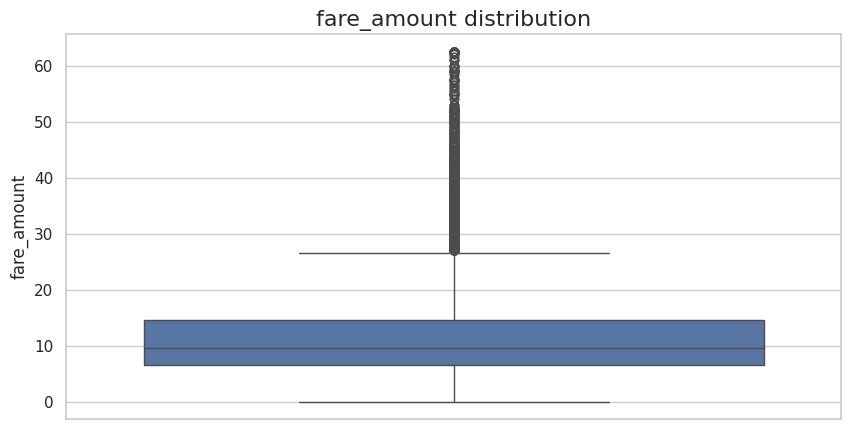

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(df0["fare_amount"])
plt.title('fare_amount distribution', fontsize=16);
print(df0["fare_amount"].quantile(0.25))
print(df0["fare_amount"].quantile(0.75))

In [66]:
df0["fare_amount"].describe()

,fare_amount
count,22595.000000
mean,12.772636
std,10.245335
min,2.500000
25%,6.500000
50%,9.500000
75%,14.500000
max,62.500000


Text(0.5, 1.0, 'trip_distance vs fare_amount')

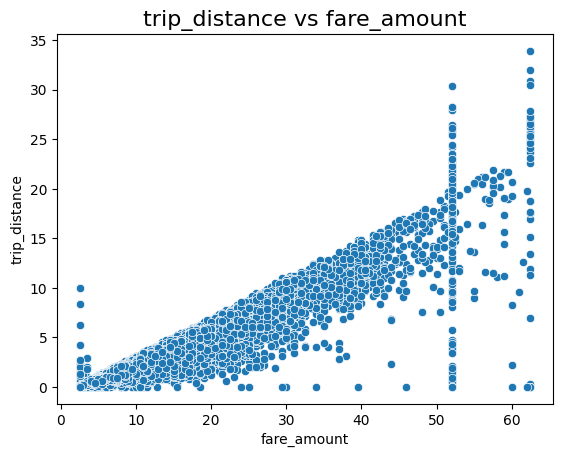

In [71]:
sns.scatterplot(data=df0, y="trip_distance", x="fare_amount")
plt.title('trip_distance vs fare_amount', fontsize=16)

Text(0.5, 1.0, 'trip_distance vs fare_amount')

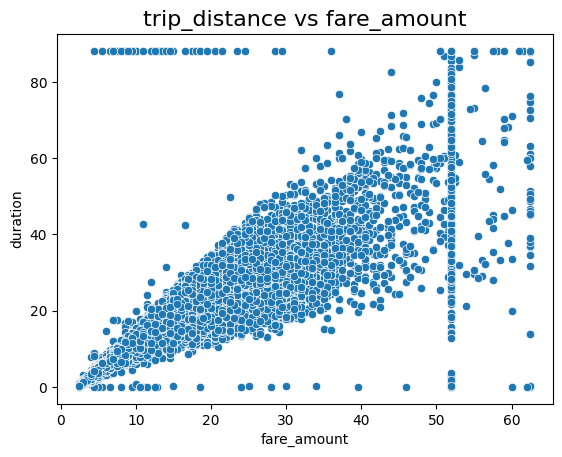

In [72]:
sns.scatterplot(data=df0, y="duration", x="fare_amount")
plt.title('trip_distance vs fare_amount', fontsize=16)

The distribution of fare amounts is non-normal, displaying a strong positive skew and a concentration of values at the lower end. This suggests that most trips are short, with a few long-distance trips driving up the overall fare amounts.

**Key Insights**:
* Positive Skew: The distribution of fare amounts is highly skewed, indicating that a significant portion of trips have lower fares, while a few trips (likely longer ones) have much higher fares.
* Concentration of Lower Values: The majority of the fare amounts are clustered around the lower end, which is typical for short trips.
* Linear Correlation: There is some linear correlation between fare amount, duration, and distance, indicating that longer trips and those covering greater distances tend to have higher fares. However, this relationship should be examined further for non-linearity, especially given the skewed distribution.
*  Airport Trips: Trips to the airport, have fixed value of 52..
* Outlier Thresholds: To deal with the influence of extreme values, we applied  a threshold for identifying outliers in both duration and fare amount.

##Predictive model

###Preperation

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22679 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22679 non-null  int64         
 1   tpep_pickup_datetime   22679 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22679 non-null  datetime64[ns]
 3   passenger_count        22679 non-null  int64         
 4   trip_distance          22679 non-null  float64       
 5   RatecodeID             22679 non-null  int64         
 6   store_and_fwd_flag     22679 non-null  object        
 7   PULocationID           22679 non-null  int64         
 8   DOLocationID           22679 non-null  int64         
 9   payment_type           22679 non-null  int64         
 10  fare_amount            22679 non-null  float64       
 11  extra                  22679 non-null  float64       
 12  tip_amount             22679 non-null  float64       
 13  tolls_

Check the correlations of our Variables

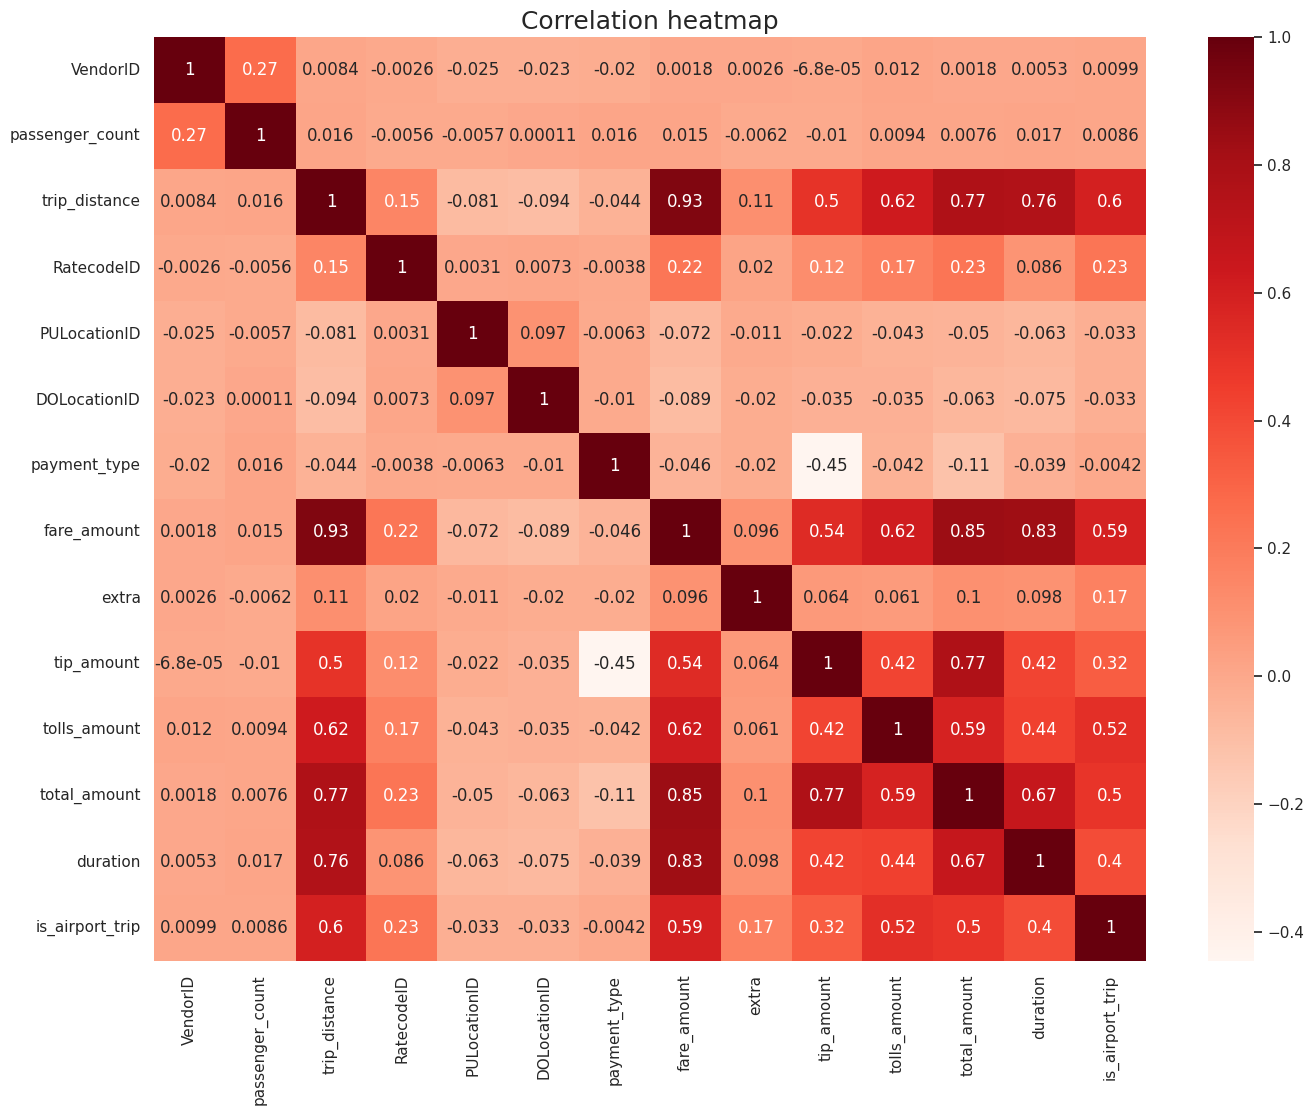

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df0.select_dtypes(include=['number']).corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

### Analysis on Days and ANOVA test

* The null hypothesis (𝐻0) is that there is no difference in the mean fare amount between the days of the week.
* The alternative hypothesis (H1​) is that at least one day has a different mean fare amount.


In [84]:
import scipy.stats as stats
df0['day'] = pd.Categorical(df0['day'], categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

# Perform One-Way ANOVA test
anova_result = stats.f_oneway(
    df0[df0['day'] == 'Mon']['fare_amount'],
    df0[df0['day'] == 'Tue']['fare_amount'],
    df0[df0['day'] == 'Wed']['fare_amount'],
    df0[df0['day'] == 'Thu']['fare_amount'],
    df0[df0['day'] == 'Fri']['fare_amount'],
    df0[df0['day'] == 'Sat']['fare_amount'],
    df0[df0['day'] == 'Sun']['fare_amount']
)

# Print the result
print(f"ANOVA test statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")


ANOVA test statistic: 2.2383112436117756
ANOVA p-value: 0.036733731291024085


Since the p-value is less than 0.05, **we reject the null hypothesis** and conclude that **there is** a statistically significant difference in the mean fare amounts across different days of the week.

This indicates that the fare amount varies by day, so we will include the **day** variable in our model after applying one-hot encoding. Additionally, we will include variables with strong correlations, such as **trip_distance** and **duration**. We will also incorporate the **is_airport_trip** variable derived from RatecodeID, as well as the **extra** variable, which provides information about rush hours.

### The model

In [86]:
df = df0[['is_airport_trip', 'trip_distance',"duration","extra","day", 'fare_amount' ]]
df = pd.get_dummies(df, columns=["day"], drop_first=True)


In [87]:
X = df.drop(columns=['fare_amount'])

# Set y variable
y = df[['fare_amount']]


In [88]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [89]:
scaler = StandardScaler().fit(X_train)
#X_train_scaled = scaler.transform(X_train)
X_train_scaled =  X_train


In [90]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [92]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9282294390419656
R^2: 0.9282294390419656
MAE: 0.9823154664364637
MSE: 7.411395322097712
RMSE: 2.722387797889513


We scale the data to ensure that all features contribute equally to the model, preventing any variables with larger ranges from dominating the learning process.

In [93]:
# Scale the X_test data
#X_test_scaled = scaler.transform(X_test)
X_test_scaled = X_test

In [95]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)

y_pred_test[X_test['is_airport_trip'] == 1] = 52




Coefficient of determination: 0.8982003991456463


In [96]:
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2: 0.948474983354416
MAE: 0.8281934618363798
MSE: 5.668782047978296
RMSE: 2.3809204203371217


In [97]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})

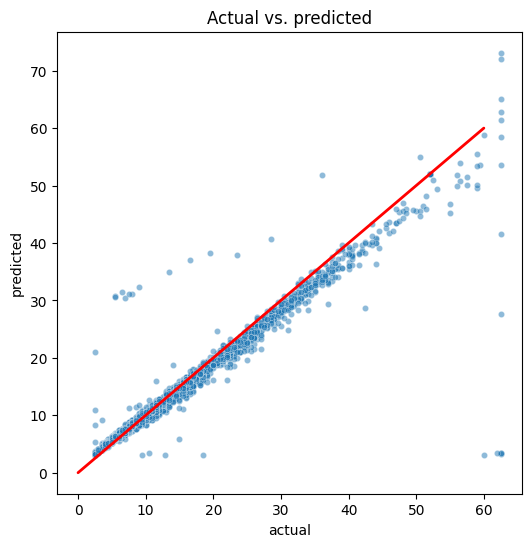

In [98]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',y='predicted', data=results,s=20,alpha=0.5,ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

In [99]:
results['off_abs'] = abs((100 * results['predicted'] / results['actual']) - 100)
results['off_abs'][(results['actual'] >25) & (results['actual'] <60)].describe()


,off_abs
count,561.000000
mean,4.940847
std,4.821826
min,0.000000
25%,0.000000
50%,5.029473
75%,7.338037
max,44.009029


#**Conclusions**

**Analysis of Model Performance:**

"Our model demonstrates strong overall performance metrics. However, a significant performance degradation is observed for fare amounts exceeding \$25. This is attributed to the data's highly skewed distribution, with approximately 90% of observations falling below \$20. Furthermore, a distinct concentration of actual values is identified at \$62, likely a result of outlier treatment.

Despite these limitations, the model exhibits satisfactory performance within the dominant lower-value range. To address the performance disparity for higher fare amounts, we propose the following strategies:

* Oversampling: Implement oversampling techniques to increase the representation
of data points with fare amounts greater than \$25, thereby mitigating the impact of the skewed distribution.
* Post-Prediction Scaling: Investigate and potentially apply a scaling factor (e.g., 5%) to predicted values above $25 to improve accuracy in this range.

**Key Observations and Limitations:**

The following contextual factors should be explicitly documented alongside the model results:

* Tip Correlation: Tip amounts are exclusively associated with credit card payment transactions.
* Airport Fare Constraint: Fares originating from or destined for airport locations are fixed at $52.
* Fare Amount Definition: The 'fare amount' variable represents a subset of the total cost and does not encompass additional charges such as tolls and taxes. This should be made clear to anyone reviewing the models results.


**Next Steps:**
* Log Transformation: We could explore applying a log transformation to the fare_amount to reduce skewness and potentially improve model performance.
* Excluding Airport Fares: Another potential step is to exclude airport fares, as they may disproportionately affect the fare amount due to their typically higher values.
* Feature Engineering: We could create additional features related to time zones, such as higher values for rides during peak hours.